In [1]:
import json
from pathlib import Path

import pandas as pd

from protrend.utils import Settings

report_file_path = Path(Settings.report_working_directory).joinpath('protrend_report_2022_08_31_12_42_39.json')
with open(report_file_path, 'r') as f:
    report = json.load(f)

df = pd.DataFrame(list(report.values()))
df

,source,version,system,label,objects,properties,source_label,target_label,relationships
0,collectf,0.0.1,transform,evidence,56.0,5.0,NaN,NaN,NaN
1,collectf,0.0.1,integrate,evidence,56.0,9.0,NaN,NaN,NaN
2,collectf,0.0.1,extract,organism,153.0,7.0,NaN,NaN,NaN
3,collectf,0.0.1,transform,organism,155.0,14.0,NaN,NaN,NaN
4,collectf,0.0.1,integrate,organism,153.0,19.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
373,standardizer,0.0.0,integrate,regulatoryinteraction,139.0,1.0,NaN,NaN,NaN
374,standardizer,0.0.0,transform,evidence,104.0,1.0,NaN,NaN,NaN
375,standardizer,0.0.0,integrate,evidence,104.0,1.0,NaN,NaN,NaN
376,standardizer,0.0.0,transform,publication,16139.0,1.0,NaN,NaN,NaN


In [2]:
df = pd.pivot_table(df, values='objects', index=['source', 'system'], columns=['label'], aggfunc=sum)
df = df.reindex(['extract', 'transform', 'integrate', 'load'], level='system')
df = df.fillna('-')

# set integrate numbers to load numbers
df_integrate = df.loc[:, ['load'], :].reindex(['load'], level='system')
df_integrate.index = df_integrate.index.set_levels(['integrate'], level='system')
df.loc[:, ['integrate'], :] = df_integrate
df = df.drop(columns=['integrate'])
df

label                  effector evidence      gene    motif     operon  \
source       system                                                      
abasy        extract          -        -   11662.0        -          -   
             transform        -        -   11542.0        -          -   
             integrate        -        -    9330.0        -          -   
             load             -        -    9330.0        -          -   
collectf     extract          -        -    1980.0        -          -   
             transform        -     56.0    1976.0        -          -   
             integrate        -     56.0    1976.0        -          -   
             load             -     56.0    1976.0        -          -   
coryneregnet extract          -        -    3921.0        -          -   
             transform        -      3.0    3881.0        -          -   
             integrate        -      3.0     405.0        -          -   
             load             -      3.0     405.0        -          -   
dbtbs        extract          -        -     682.0        -          -   
             transform        -        -     682.0        -          -   
             integrate        -        -      16.0        -          -   
             load             -        -      16.0        -          -   
literature   extract      140.0        -    4859.0        -          -   
             transform    140.0        -    4859.0        -          -   
             integrate     90.0        -     615.0        -          -   
             load          90.0        -     615.0        -          -   
motif        transform        -        -         -  80107.0          -   
             integrate        -        -         -  15645.0          -   
             load             -        -         -  15645.0          -   
operondb     extract          -        -         -        -  6135320.0   
             transform        -        -   13189.0        -    24690.0   
             integrate        -        -     564.0        -    24690.0   
             load             -        -     564.0        -    24690.0   
regprecise   extract      308.0        -   15284.0        -          -   
             transform    308.0        -  102327.0        -          -   
             integrate    308.0        -  101512.0        -          -   
             load         308.0        -  101512.0        -          -   
regulondb    extract      137.0        -    4168.0        -          -   
             transform    137.0    127.0    4085.0        -          -   
             integrate    103.0    123.0    1560.0        -          -   
             load         103.0    123.0    1560.0        -          -   
standardizer transform     69.0    104.0    3448.0        -        0.0   
             integrate      NaN      NaN       NaN      NaN        NaN   

label                  organism pathway publication regulator  \
source       system                                             
abasy        extract        9.0       -           -     706.0   
             transform      9.0       -           -     706.0   
             integrate      3.0       -           -     524.0   
             load           3.0       -           -     524.0   
collectf     extract      153.0       -           -     342.0   
             transform    155.0       -       526.0     236.0   
             integrate    153.0       -       526.0     230.0   
             load         153.0       -       526.0     230.0   
coryneregnet extract          -       -           -     539.0   
             transform      4.0       -       465.0     538.0   
             integrate        -       -       441.0     168.0   
             load             -       -       441.0     168.0   
dbtbs        extract          -       -           -     109.0   
             transform      1.0       -       819.0     109.0   
             integrate        -       -       462.0         -   
        

In [3]:
# this excel should be manually corrected
df.to_excel('./integration_report.xlsx')

In [20]:
df_integration = pd.read_excel('./integration_report.xlsx', index_col=0)
df_integration.index = pd.Series(df_integration.index).fillna(method='ffill')
df_integration = df_integration.drop(index=['ODB', 'Motif', 'Standardizer'])
df_integration = df_integration.dropna(subset=['System'])
df_integration = df_integration.replace({'-': None, 'extract': 'E', 'transform': 'T', 'integrate': 'I', 'load': 'L'})
df_integration

,System,Effector,Evidence,Gene,Motif,Operon,Organism,Pathway,Publication,Regulator,RegulatoryFamily,RegulatoryInteraction,Source.1,TFBS
Source,,,,,,,,,,,,,,
Abasy,E,NaN,NaN,11662,None,None,9.0,NaN,NaN,706.0,NaN,NaN,NaN,NaN
Abasy,T,NaN,NaN,11542,None,None,9.0,NaN,NaN,706.0,NaN,11318.0,1.0,NaN
Abasy,I,NaN,NaN,9330,None,None,3.0,NaN,NaN,524.0,NaN,11315.0,1.0,NaN
Abasy,L,NaN,NaN,9330,None,None,3.0,NaN,NaN,524.0,NaN,11315.0,1.0,NaN
CollecTF,E,NaN,NaN,1980,None,None,153.0,NaN,NaN,342.0,NaN,NaN,NaN,3649.0
CollecTF,T,NaN,56.0,1976,None,None,155.0,NaN,526.0,236.0,NaN,2539.0,1.0,3579.0
CollecTF,I,NaN,56.0,1976,None,None,153.0,NaN,526.0,230.0,NaN,2539.0,1.0,3579.0
CollecTF,L,NaN,56.0,1976,None,None,153.0,NaN,526.0,230.0,NaN,2539.0,1.0,3579.0
CoryneRegNet,E,NaN,NaN,3921,None,None,NaN,NaN,NaN,539.0,NaN,NaN,NaN,4841.0


In [21]:
data = df_integration.reset_index(drop=False)
src_order = ['CollecTF', 'RegPrecise', 'Abasy', 'CoryneRegNet', 'Literature', 'DBTBS', 'RegulonDB']
system_order = ['E', 'T', 'I', 'L']

data['Source'] = pd.Categorical(data['Source'], src_order)
data['System'] = pd.Categorical(data['System'], system_order)
data = data.sort_values(['Source', 'System'])
data

,Source,System,Effector,Evidence,Gene,Motif,Operon,Organism,Pathway,Publication,Regulator,RegulatoryFamily,RegulatoryInteraction,Source.1,TFBS
4,CollecTF,E,NaN,NaN,1980,None,None,153.0,NaN,NaN,342.0,NaN,NaN,NaN,3649.0
5,CollecTF,T,NaN,56.0,1976,None,None,155.0,NaN,526.0,236.0,NaN,2539.0,1.0,3579.0
6,CollecTF,I,NaN,56.0,1976,None,None,153.0,NaN,526.0,230.0,NaN,2539.0,1.0,3579.0
7,CollecTF,L,NaN,56.0,1976,None,None,153.0,NaN,526.0,230.0,NaN,2539.0,1.0,3579.0
20,RegPrecise,E,308.0,NaN,15284,None,None,524.0,NaN,NaN,15432.0,NaN,NaN,NaN,68115.0
21,RegPrecise,T,308.0,NaN,102327,None,None,524.0,287.0,311.0,15315.0,171.0,171187.0,1.0,67582.0
22,RegPrecise,I,308.0,NaN,101512,None,None,460.0,287.0,299.0,15227.0,171.0,171187.0,1.0,67582.0
23,RegPrecise,L,308.0,NaN,101512,None,None,460.0,287.0,299.0,15227.0,171.0,171187.0,1.0,67582.0
0,Abasy,E,NaN,NaN,11662,None,None,9.0,NaN,NaN,706.0,NaN,NaN,NaN,NaN
1,Abasy,T,NaN,NaN,11542,None,None,9.0,NaN,NaN,706.0,NaN,11318.0,1.0,NaN


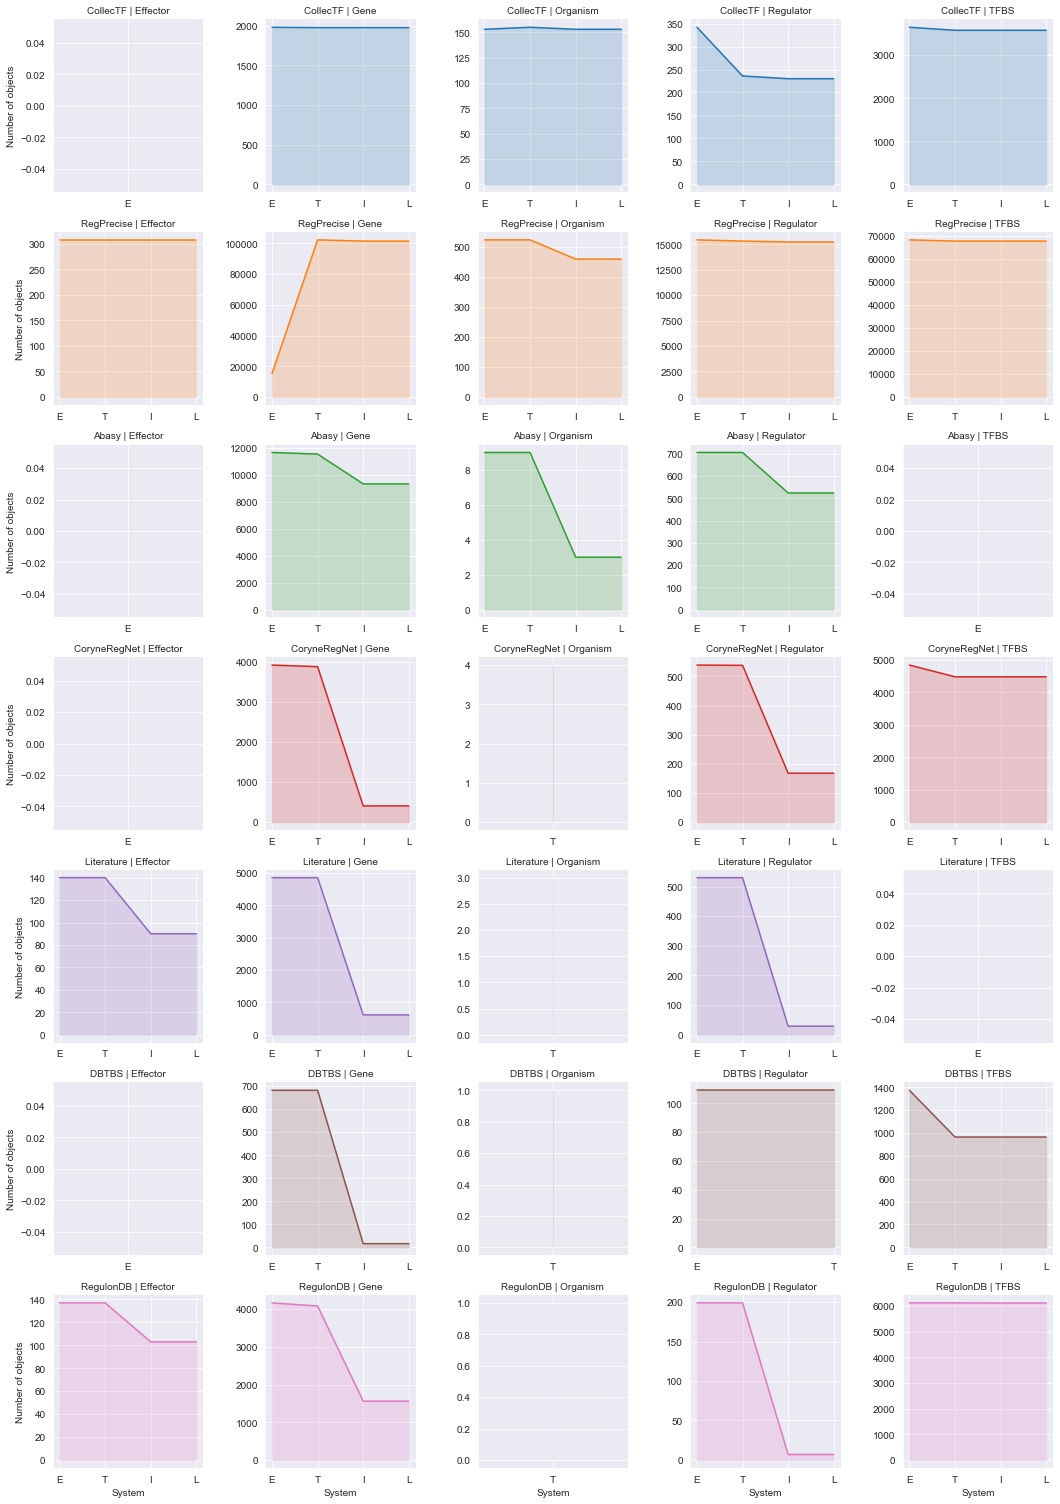

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

sub_set = data[['Effector', 'Gene', 'Organism', 'Regulator', 'TFBS', 'Source', 'System']]
sub_set = pd.melt(sub_set,
                  id_vars=['Source', 'System'],
                  value_vars=['Effector', 'Gene', 'Organism', 'Regulator', 'TFBS'],
                  var_name='Object',
                  value_name='Value')

# Create a grid : initialize it
g = sns.FacetGrid(sub_set, col='Object', row='Source', hue='Source', sharex=False, sharey=False)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'System', 'Value')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'System', 'Value', alpha=0.2).set_titles("{col_name} source")

# Control the title of each facet
g = g.set_titles(col_template="{col_name}", row_template="{row_name}")
g = g.set_ylabels('Number of objects')

# Save & show the graph
plt.savefig("integration_report.png", bbox_inches="tight", dpi=150)
plt.show()